In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 스케일링과 노말라이제이션

In [2]:
import pandas as pd
import numpy as np

from scipy import stats

from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

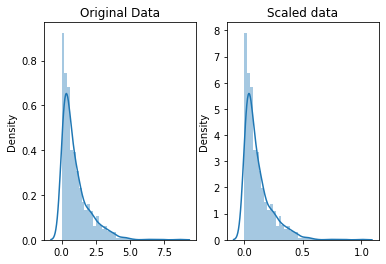

In [3]:
# 지수 분포에서 무작위로 추출한 1000개의 데이터 포인트 생성
original_data = np.random.exponential(size=1000)

# mix-max 0과 1 사이의 데이터 스케일
scaled_data = minmax_scaling(original_data, columns=[0])

# 비교하기 위해 둘 모두를 그래프로 그림
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

# 결측치

In [8]:
import pandas as pd
import numpy as np

nfl_data = pd.read_csv("/content/drive/MyDrive/21_ls/2회차/NFL Play by Play 2009-2017 (v4).csv")

np.random.seed(0) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# 열당 누락된(null 값의) 데이터의 수
missing_values_count = nfl_data.isnull().sum()

# 상위 10개의 열에서 누락된 데이터의 수 보기
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [10]:
# 총 결측값의 수
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# 누락된 데이터 비율
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.87214126835169


In [11]:
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [12]:
nfl_data.dropna(axis=1)

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType,Passer_ID,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,Rusher_ID,RushAttempt,Receiver_ID,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,0,0,0,Kickoff,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,0,0,0,Pass,00-0022924,1,-3,8,0,0,None,0,00-0017162,1,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,0,0,0,Run,None,0,0,0,0,0,00-0022250,1,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,0,0,0,Pass,00-0022924,1,34,0,0,0,None,0,00-0026901,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,0,0,0,Punt,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,1,0,-4,1,0,0,0,0,0,Timeout,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,BAL,CIN,1,BAL,0,3,0,2,0,0.0,0.0,2017
407684,2017-12-31,2017123101,29,4,1,14,-4,1,0,0,0,0,0,Pass,00-0026158,1,12,0,0,0,None,0,00-0026901,0,0,0,0,0,0,BAL,CIN,0,None,2,2,0,2,0,0.0,0.0,2017
407685,2017-12-31,2017123101,29,4,1,14,9,1,13,0,0,0,0,Pass,00-0026158,1,10,3,0,0,None,0,00-0022943,1,0,0,0,0,0,BAL,CIN,0,None,2,2,0,2,0,0.0,0.0,2017
407686,2017-12-31,2017123101,30,4,1,10,-1,1,-1,0,0,0,0,QB Kneel,None,0,0,0,0,0,00-0027973,0,None,0,0,0,0,0,0,BAL,CIN,0,None,0,2,0,2,0,0.0,0.0,2017


In [13]:
# 보기 쉽게 NFL 데이터셋에서 EPA 에서 Season 까지의 컬럼만을 추출
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [14]:
# 모든 Na값을 0으로 채우기
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [15]:
# 동일한 열에서 모든 NA 값을 다음에 오는 값으로 대체합니다.
# 나머지 na를 모두 0으로 바꿉니다.
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


# 날짜 및 시간변수 처리

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

landslides = pd.read_csv("/content/drive/MyDrive/21_ls/2회차/catalog.csv")

np.random.seed(0)

In [17]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [18]:
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [19]:
landslides['date'].dtype

dtype('O')

In [20]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [21]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [22]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

# Pandas 활용

In [24]:
import pandas as pd

In [25]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})


,Yes,No
0,50,131
1,21,2


In [26]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})


,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


In [27]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


In [28]:
pd.Series([1, 2, 3, 4, 5])


0    1
1    2
2    3
3    4
4    5
dtype: int64

In [29]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')


2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

In [31]:
wine_reviews = pd.read_csv("/content/drive/MyDrive/21_ls/2회차/winemag-data-130k-v2.csv")

In [32]:
wine_reviews.shape

(129971, 14)

In [33]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Native accessors

In [36]:
wine_reviews.country

0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object

In [37]:
wine_reviews['country']

0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object

In [38]:
wine_reviews['country'][0]

'Italy'

## Indexing in pandas


In [39]:
wine_reviews.iloc[0]

Unnamed: 0                                                               0
country                                                              Italy
description              Aromas include tropical fruit, broom, brimston...
designation                                                   Vulkà Bianco
points                                                                  87
price                                                                  NaN
province                                                 Sicily & Sardinia
region_1                                                              Etna
region_2                                                               NaN
taster_name                                                  Kerin O’Keefe
taster_twitter_handle                                         @kerinokeefe
title                                    Nicosia 2013 Vulkà Bianco  (Etna)
variety                                                        White Blend
winery                   

In [40]:
wine_reviews.iloc[:, 0]

0              0
1              1
2              2
3              3
4              4
           ...  
129966    129966
129967    129967
129968    129968
129969    129969
129970    129970
Name: Unnamed: 0, Length: 129971, dtype: int64

In [41]:
wine_reviews.iloc[:3, 0]

0    0
1    1
2    2
Name: Unnamed: 0, dtype: int64

In [42]:
wine_reviews.iloc[1:3, 0]

1    1
2    2
Name: Unnamed: 0, dtype: int64

In [43]:
wine_reviews.iloc[-5:]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [44]:
wine_reviews.loc[0, 'country']

'Italy'

In [45]:
wine_reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]

,taster_name,taster_twitter_handle,points
0,Kerin O’Keefe,@kerinokeefe,87
1,Roger Voss,@vossroger,87
2,Paul Gregutt,@paulgwine,87
3,Alexander Peartree,NaN,87
4,Paul Gregutt,@paulgwine,87
...,...,...,...
129966,Anna Lee C. Iijima,NaN,90
129967,Paul Gregutt,@paulgwine,90
129968,Roger Voss,@vossroger,90
129969,Roger Voss,@vossroger,90


## Manipulating the index


In [46]:
wine_reviews.set_index("title")

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
title,,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
Quinta dos Avidagos 2011 Avidagos Red (Douro),1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
Rainstorm 2013 Pinot Gris (Willamette Valley),2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm
St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,Riesling,St. Julian
Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel),129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
Citation 2004 Pinot Noir (Oregon),129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Pinot Noir,Citation
Domaine Gresser 2013 Kritt Gewurztraminer (Alsace),129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Gewürztraminer,Domaine Gresser


## Conditional selection


In [47]:
wine_reviews.country == 'Italy'

0          True
1         False
2         False
3         False
4         False
          ...  
129966    False
129967    False
129968    False
129969    False
129970    False
Name: country, Length: 129971, dtype: bool

In [48]:
wine_reviews.loc[reviews.country == 'Italy']

NameError: ignored

In [ ]:
wine_reviews.loc[(wine_reviews.country == 'Italy') & (wine_reviews.points >= 90)]

In [49]:
wine_reviews.loc[wine_reviews.country.isin(['Italy', 'France'])]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
11,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129964,129964,France,"Initially quite muted, this wine slowly develo...",Domaine Saint-Rémy Herrenweg,90,NaN,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Ehrhart 2013 Domaine Saint-Rémy Herren...,Gewürztraminer,Domaine Ehrhart
129965,129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [50]:
wine_reviews.loc[wine_reviews.price.notnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## Assigning data


In [51]:
wine_reviews['critic'] = 'everyone'
wine_reviews['critic']

0         everyone
1         everyone
2         everyone
3         everyone
4         everyone
            ...   
129966    everyone
129967    everyone
129968    everyone
129969    everyone
129970    everyone
Name: critic, Length: 129971, dtype: object

## Summary functions


In [52]:
wine_reviews.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [53]:
wine_reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

In [54]:
wine_reviews.points.mean()

88.44713820775404

In [55]:
wine_reviews.taster_name.unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [56]:
wine_reviews.taster_name.value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

## Maps

In [57]:
review_points_mean = wine_reviews.points.mean()
wine_reviews.points.map(lambda p: p - review_points_mean)

0        -1.447138
1        -1.447138
2        -1.447138
3        -1.447138
4        -1.447138
            ...   
129966    1.552862
129967    1.552862
129968    1.552862
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In [58]:
def remean_points(row):
    row.points = row.points - review_points_mean
    return row

wine_reviews.apply(remean_points, axis='columns')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,-1.447138,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,-1.447138,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,everyone
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,-1.447138,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,everyone
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,-1.447138,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,everyone
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,-1.447138,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,1.552862,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),everyone
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,1.552862,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,everyone
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,1.552862,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,everyone
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,1.552862,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,everyone


In [59]:
wine_reviews.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone


In [60]:
review_points_mean = wine_reviews.points.mean()
wine_reviews.points - review_points_mean

0        -1.447138
1        -1.447138
2        -1.447138
3        -1.447138
4        -1.447138
            ...   
129966    1.552862
129967    1.552862
129968    1.552862
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In [61]:
wine_reviews.country + " - " + wine_reviews.region_1

0                     Italy - Etna
1                              NaN
2           US - Willamette Valley
3         US - Lake Michigan Shore
4           US - Willamette Valley
                    ...           
129966                         NaN
129967                 US - Oregon
129968             France - Alsace
129969             France - Alsace
129970             France - Alsace
Length: 129971, dtype: object

## Groupwise analysis


In [62]:
wine_reviews.groupby('points').points.count()

points
80       397
81       692
82      1836
83      3025
84      6480
85      9530
86     12600
87     16933
88     17207
89     12226
90     15410
91     11359
92      9613
93      6489
94      3758
95      1535
96       523
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [63]:
wine_reviews.groupby('points').price.min()

points
80      5.0
81      5.0
82      4.0
83      4.0
84      4.0
85      4.0
86      4.0
87      5.0
88      6.0
89      7.0
90      8.0
91      7.0
92     11.0
93     12.0
94     13.0
95     20.0
96     20.0
97     35.0
98     50.0
99     44.0
100    80.0
Name: price, dtype: float64

In [64]:
wine_reviews.groupby('winery').apply(lambda df: df.title.iloc[0])

winery
1+1=3                                     1+1=3 NV Rosé Sparkling (Cava)
10 Knots                            10 Knots 2010 Viognier (Paso Robles)
100 Percent Wine              100 Percent Wine 2015 Moscato (California)
1000 Stories           1000 Stories 2013 Bourbon Barrel Aged Zinfande...
1070 Green                  1070 Green 2011 Sauvignon Blanc (Rutherford)
                                             ...                        
Órale                       Órale 2011 Cabronita Red (Santa Ynez Valley)
Öko                    Öko 2013 Made With Organically Grown Grapes Ma...
Ökonomierat Rebholz    Ökonomierat Rebholz 2007 Von Rotliegenden Spät...
àMaurice               àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                                    Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

In [65]:
wine_reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

Unnamed: 0  ...    critic
country   province                      ...          
Argentina Mendoza Province       82754  ...  everyone
          Other                  78303  ...  everyone
Armenia   Armenia                66146  ...  everyone
Australia Australia Other        37882  ...  everyone
          New South Wales        85337  ...  everyone
...                                ...  ...       ...
Uruguay   Juanico                 9133  ...  everyone
          Montevideo             15750  ...  everyone
          Progreso               93103  ...  everyone
          San Jose               39898  ...  everyone
          Uruguay                39361  ...  everyone

[425 rows x 15 columns]

In [66]:
wine_reviews.groupby(['country']).price.agg([len, min, max])

,len,min,max
country,,,
Argentina,3800.0,4.0,230.0
Armenia,2.0,14.0,15.0
Australia,2329.0,5.0,850.0
Austria,3345.0,7.0,1100.0
Bosnia and Herzegovina,2.0,12.0,13.0
Brazil,52.0,10.0,60.0
Bulgaria,141.0,8.0,100.0
Canada,257.0,12.0,120.0
Chile,4472.0,5.0,400.0


## Multi-indexes

In [67]:
countries_reviewed = wine_reviews.groupby(['country', 'province']).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
Armenia   Armenia              2
Australia Australia Other    245
          New South Wales     85
...                          ...
Uruguay   Juanico             12
          Montevideo          11
          Progreso            11
          San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [68]:
mi = countries_reviewed.index
type(mi)

pandas.core.indexes.multi.MultiIndex

In [69]:
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
2,Armenia,Armenia,2
3,Australia,Australia Other,245
4,Australia,New South Wales,85
...,...,...,...
420,Uruguay,Juanico,12
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
423,Uruguay,San Jose,3


## Sorting

In [70]:
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len')

,country,province,len
179,Greece,Muscat of Kefallonian,1
192,Greece,Sterea Ellada,1
194,Greece,Thraki,1
354,South Africa,Paardeberg,1
40,Brazil,Serra do Sudeste,1
...,...,...,...
409,US,Oregon,5373
227,Italy,Tuscany,5897
118,France,Bordeaux,5941
415,US,Washington,8639


In [71]:
countries_reviewed.sort_values(by='len', ascending=False)

,country,province,len
392,US,California,36247
415,US,Washington,8639
118,France,Bordeaux,5941
227,Italy,Tuscany,5897
409,US,Oregon,5373
...,...,...,...
101,Croatia,Krk,1
247,New Zealand,Gladstone,1
357,South Africa,Piekenierskloof,1
63,Chile,Coelemu,1


In [72]:
countries_reviewed.sort_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
2,Armenia,Armenia,2
3,Australia,Australia Other,245
4,Australia,New South Wales,85
...,...,...,...
420,Uruguay,Juanico,12
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
423,Uruguay,San Jose,3


In [73]:
countries_reviewed.sort_values(by=['country', 'len'])

,country,province,len
1,Argentina,Other,536
0,Argentina,Mendoza Province,3264
2,Armenia,Armenia,2
6,Australia,Tasmania,42
4,Australia,New South Wales,85
...,...,...,...
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
420,Uruguay,Juanico,12
424,Uruguay,Uruguay,24


## Dtypes


In [74]:
wine_reviews.price.dtype

dtype('float64')

In [75]:
wine_reviews.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
critic                    object
dtype: object

In [76]:
wine_reviews.points.astype('float64')

0         87.0
1         87.0
2         87.0
3         87.0
4         87.0
          ... 
129966    90.0
129967    90.0
129968    90.0
129969    90.0
129970    90.0
Name: points, Length: 129971, dtype: float64

In [77]:
wine_reviews.index.dtype

dtype('int64')

## Missing data

In [78]:
wine_reviews[pd.isnull(wine_reviews.country)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic
913,913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines,everyone
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier,everyone
4243,4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking,everyone
9509,9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis,everyone
9750,9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi,everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy,everyone
129407,129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho,everyone
129408,129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho,everyone
129590,129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ,everyone


In [79]:
wine_reviews.region_2.fillna("Unknown")

0                   Unknown
1                   Unknown
2         Willamette Valley
3                   Unknown
4         Willamette Valley
                ...        
129966              Unknown
129967         Oregon Other
129968              Unknown
129969              Unknown
129970              Unknown
Name: region_2, Length: 129971, dtype: object

In [80]:
wine_reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")

0             @kerino
1          @vossroger
2         @paulgwine 
3                 NaN
4         @paulgwine 
             ...     
129966            NaN
129967    @paulgwine 
129968     @vossroger
129969     @vossroger
129970     @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object